###: this file should read the data from consolidated.csv

###:this should do all of the analysis

### :General Note - Any Analysis that can be done for cases can be done for deaths, although cases might be easier because the data aren't lagged
Timeframe - Jan 2019 - Today
"Pre COVID" = Jan 2019 - Mar 2020


**Question 1: How did COVID Change Overall Travel Patterns?**

1) Plot 1: Scatter Plot (Points = States, X-Axis = Travel Volume, Y-Axis = Cases)

2) Plot 2: Line Graph (X-Axis = Time, Y-Axis = Travel Volume, COVID Cases)

**Question 2: Which States reacted most/least aggressively to COVID (largest change in travel patterns)**

1) Plot 1: (Pick 2 states, e.g. CA, TX) - Time Series of COVID Cases and Travel Volume (Overlay 2019 and 2020)

2) Plot 2: State Specific Bar Graph showing travel before / travel after (FL - 80% / 60% "pop not stay at home"), potentially all 50 states

**Question 3: How did COVID change the nature / length of travel?**

1) Plot 1: Time Series of Trip Type over Time (Nationally)

2) Plot 2: Scatter Plot of Counties that Changed the Most

**Question 4: Did Reducing Travel Reduce COVID**

1) Plot 1: Bar graph (by state) PRE-COVID Trips vs. COVID Trips (timeframe TBD)

2) Plot 2: TBD


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
path = "~/Downloads/covid_data.csv"
covid_df = pd.read_csv(path)
covid_df

,Unnamed: 0,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%
0,0,MO,0,NaN,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,...,809030.0,290444.0,154169.0,39949.0,29170.0,6107725.0,0.000000,0.000000,25.062769,74.937231
1,1,LA,0,NaN,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,...,530891.0,249210.0,97879.0,22007.0,14093.0,4645731.0,0.000000,0.000000,22.439332,77.560668
2,2,AZ,0,NaN,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,...,865350.0,278933.0,190394.0,39342.0,43397.0,7149726.0,0.000000,0.000000,24.071216,75.928784
3,3,AR,0,NaN,0,NaN,2019-01-01,642665.0,2361951.0,7488494.0,...,347585.0,154771.0,67697.0,16563.0,7904.0,3004616.0,0.000000,0.000000,21.389256,78.610744
4,4,CA,0,NaN,0,NaN,2019-01-01,9212440.0,30223696.0,111648618.0,...,5318558.0,2111397.0,750377.0,178478.0,214788.0,39436136.0,0.000000,0.000000,23.360402,76.639598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,53800,SD,162375,0.0,2305,0.0,2021-11-20,171947.0,712712.0,3636567.0,...,178228.0,100882.0,49912.0,5480.0,2510.0,884659.0,18.354530,0.260552,19.436529,80.563471
53801,53801,CA,5014428,0.0,73000,0.0,2021-11-20,10043294.0,29468929.0,123467116.0,...,6447071.0,2787076.0,1054817.0,234871.0,134765.0,39512223.0,12.690827,0.184753,25.418195,74.581805
53802,53802,OH,1639070,5590.0,26063,0.0,2021-11-20,2448434.0,9240666.0,52206417.0,...,1923585.0,785995.0,319374.0,45441.0,29849.0,11689100.0,14.022209,0.222968,20.946300,79.053700
53803,53803,UT,582929,0.0,3428,0.0,2021-11-20,716625.0,2489333.0,12783889.0,...,667482.0,225500.0,99433.0,29599.0,16726.0,3205958.0,18.182677,0.106926,22.352913,77.647087


In [3]:
CA_COVID_1 = covid_df[covid_df['state']== "CA"]
CA_COVID_2 = CA_COVID_1[CA_COVID_1['tot_cases']!= 0]
CA_COVID_3 = CA_COVID_2.dropna()
CA_COVID_3.head()

,Unnamed: 0,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%
20247,20247,CA,3,3.0,0,0.0,2020-02-02,8674130.0,30882915.0,120969857.0,...,5779739.0,2224657.0,880903.0,214320.0,147714.0,39557045.0,0.000008,0.0,21.928155,78.071845
20337,20337,CA,6,3.0,0,0.0,2020-02-03,7516164.0,32040881.0,137082176.0,...,7226417.0,2406472.0,860342.0,205845.0,154855.0,39557045.0,0.000015,0.0,19.000823,80.999177
20368,20368,CA,6,0.0,0,0.0,2020-02-04,7404908.0,32152137.0,137334133.0,...,7365334.0,2429285.0,792546.0,198781.0,159265.0,39557045.0,0.000015,0.0,18.719568,81.280432
20434,20434,CA,6,0.0,0,0.0,2020-02-05,7389989.0,32167056.0,140458490.0,...,7324225.0,2416066.0,788039.0,210519.0,165528.0,39557045.0,0.000015,0.0,18.681853,81.318147
20458,20458,CA,6,0.0,0,0.0,2020-02-06,7369817.0,32187228.0,142169443.0,...,7431876.0,2447328.0,790135.0,215653.0,164722.0,39557045.0,0.000015,0.0,18.630858,81.369142


In [4]:
TX_COVID_1 = covid_df[covid_df['state']== "TX"]
TX_COVID_2 = TX_COVID_1[TX_COVID_1['tot_cases']!= 0]
TX_COVID_3 = TX_COVID_2.dropna()

<AxesSubplot:>

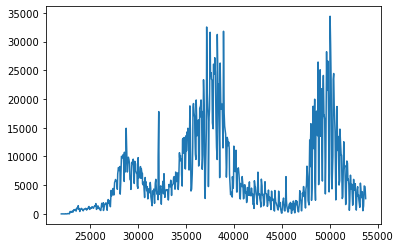

In [5]:
TX_COVID_3['new_case'].plot()

In [6]:
import seaborn as sns
from IPython.display import display
plot_data = {}
for state in ['CA',"TX","IL","NY","FL"]:
    df = covid_df[covid_df.state == state]
    df.index = pd.to_datetime(df.Date)
    plot_data[state] = df[['new_case','Number of Trips']].dropna()


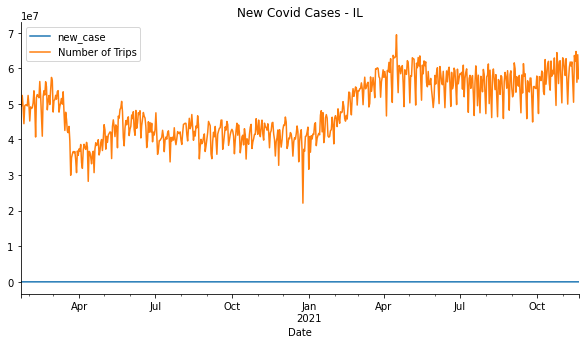

In [7]:
plot_data['IL'].plot(label='IL',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - IL')
plt.legend();

In [8]:
tx = plot_data['TX']
tx['month'] = tx.index.month

In [9]:
tx

,new_case,Number of Trips,month
Date,,,
2020-01-22,0.0,94342336.0,1
2020-01-23,0.0,100218909.0,1
2020-01-24,0.0,107179008.0,1
2020-01-25,0.0,97779266.0,1
2020-01-26,0.0,87097238.0,1
...,...,...,...
2021-11-16,4301.0,109844231.0,11
2021-11-17,4867.0,114412236.0,11
2021-11-18,4744.0,99736696.0,11


In [10]:
txdiff = tx.diff()

In [11]:
txdiff['month'] = tx['month']

Text(0.5, 1.0, 'Texas New Cases vs. Trips (month by month)')

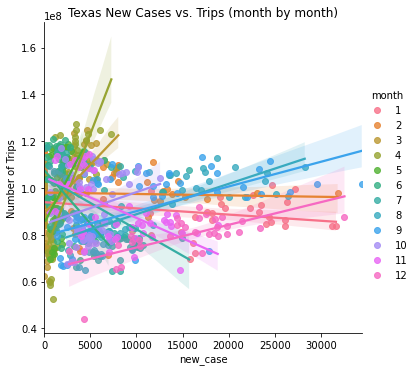

In [12]:

sns.lmplot(
    data=tx,
    x="new_case", y='Number of Trips', hue="month",
    height=5
)
plt.title("Texas New Cases vs. Trips (month by month)")

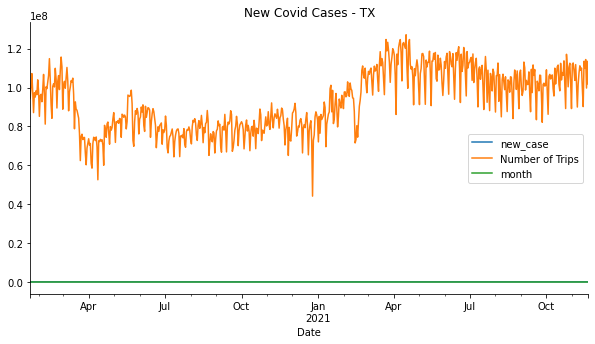

In [13]:
plot_data['TX'].plot(label='TX',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - TX')
plt.legend();

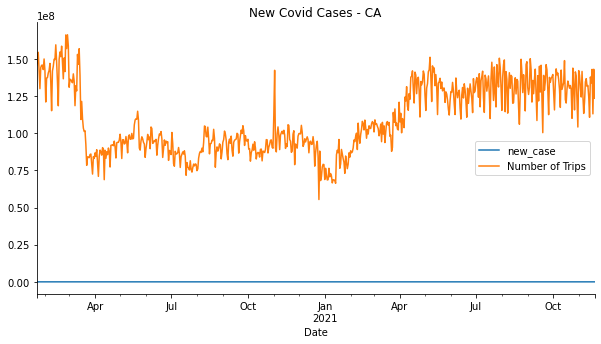

In [14]:
plot_data['CA'].plot(label='CA',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - CA')
plt.legend();

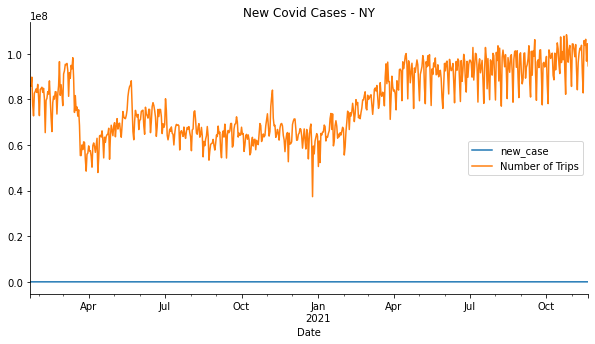

In [15]:
plot_data['NY'].plot(label='NY',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - NY')
plt.legend();

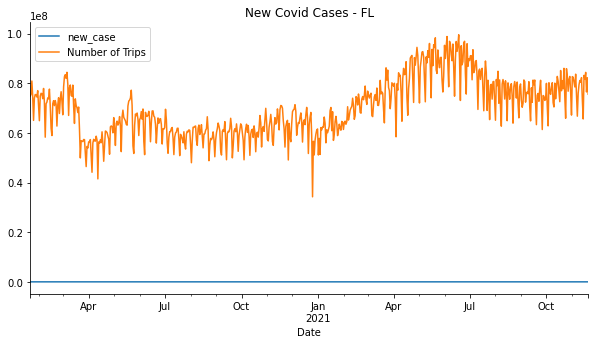

In [16]:
plot_data['FL'].plot(label="FL",figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - FL')
plt.legend();

In [ ]:
frame = pd.DataFrame()
for key in plot_data.keys():
    frame[key] = plot_data[key]

In [ ]:
frame.plot(subplots=True)

In [ ]:
differenced = frame.diff()

In [ ]:
pd.plotting.scatter_matrix(frame,figsize=(12,8));
plt.title('Daily Change in New Cases - State vs. State')

In [ ]:
frame['day'] = frame.index.day_name()

In [ ]:
frame['month'] = frame.index.month

In [ ]:
sns.pairplot(frame,kind="reg",hue='day')

In [ ]:
sns.pairplot(frame,hue='day')
sns.color_palette("hls", 8);


In [ ]:
frame2 = frame[['CA', 'TX', 'IL', 'NY', 'FL', 'dtime']]

In [ ]:
frame.columns

In [ ]:
frame['dtime'] = frame.index

In [ ]:
sns.pairplot(frame2,hue='dtime',palette='viridis', diag_kind=None)
# sns.color_palette("flare", as_cmap=True)
# sns.color_palette("viridis", as_cmap=True);

In [ ]:
frame

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
frame2['dtime'] = frame2.dtime.astype('str')

In [ ]:
sns.lmplot(
    data=frame,
    x="NY", y="FL", hue="month",
    height=5
)

In [ ]:
sns.lmplot(
    data=frame,
    x="IL", y="TX", hue="month",
    height=5
)

In [ ]:
states = ['CA', 'TX', 'IL', 'NY', 'FL']

In [ ]:
frame[states].rolling(7).mean().plot()

In [ ]:
detrended = frame[states].rolling(7).mean()

In [ ]:
detrended['month'] = frame.month

In [ ]:
sns.lmplot(
    data=detrended,
    x="IL", y="TX", hue="month",
    height=5
)

In [ ]:
sns.lmplot(
    data=detrended,
    x="NY", y="FL", hue="month",
    height=5
)